<a href="https://colab.research.google.com/github/JuanmaRomero/Portfolio/blob/main/Analysis%20of%20the%20behavior%20of%20the%20network%20traffic%20for%20the%20detection%20ofBotnets%20using%20Recurrent%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del comportamiento del tráfico de la red para la detección de Botnets utilizando Redes Neuronales Recurrentes


**Informe Preliminar**

**Nombre**: Juan Manuel Romero


## Introducción

Una **Botnet** es un grupo de computadoras que pueden ser controladas de forma remota para ejecutar ataques coordinados o cometer fraudes. El hecho de que las Botnets estén evolucionando constantemente hace que los enfoques tradicionales de detección estén siempre un paso por detrás.

Recientemente, el análisis del comportamiento del tráfico de la red ha surgido como una manera de abordar el problema de detección de Botnets. El enfoque de análisis de comportamiento tiene como objetivo analizar los patrones comunes que una Botnet sigue en todo su ciclo de vida, tratando de generalizar a fin de llegar a detectar tráfico de Botnet no visto. 

El reciente éxito de la aplicación de *redes neuronales recurrentes* a los problemas de datos secuenciales hacen de estas un candidato viable a la tarea de análisis de comportamiento basado en secuencias. 

En este trabajo se presenta un análisis de la viabilidad de aplicar Redes Neuronales Recurrentes (RNN) para detectar el comportamiento del tráfico de red y, en particular, se compara el rendimiento al utilizar redes LSTM y GRU. Para esto, el tráfico de la red es modelado como una secuencia de estados que cambian con el tiempo. El enfoque se basa en el uso de datos históricos que previamente han sido etiquetados como Normal o Botnet y luego entrenar a la red para finalmente obtener un modelo de detección capaz de reconocer comportamientos de conexiones.

En el proceso se hace un breve análisis de los datos, se evalúan y corrigen problemas de desvalanseo utilizando técnicas de remuestreo aleatorio. Luego se entrena una RNN y se utiliza validación cruzada (en particular, Monte-Carlo Cross Validación) para analizar el modelo. Finalmente se entrena con todo el conjunto de entrenamiento(ctu19), se testea con el conjunto de prueba(ctu13) y se hace un análisis de los resultados.  

Los resultados obtenidos permiten pensar que las redes neuronales recurrentes son capaces de clasificar el comportamiento del tráfico.


## Marco Teorico

### Redes Recurrentes

#### RNN

Las **Redes neuronales recurrentes (RNNs)** son redes neuronales que son excelentes para el procesamiento de lenguaje natural. Construyen una representación vectorial para cada token leyendo token por token y “recordando” información importante, cada uno de los cuales se utiliza para actualizar un estado oculto. Es decir, son redes con bucles que permiten que la información persista y son capaces de manejar datos secuenciales tales como secuencias de texto. Las RNN se llaman recurrentes porque realizan la misma tarea para cada elemento de una secuencia, y la salida depende de los cálculos previos.

La RNN simple, también denominada vanilla, tiene la forma de una cadena de módulo repetitivo de red neuronal. Este módulo de repetición tiene una estructura muy simple con una sola capa tanh, que es la función de activación, con valores entre -1 y 1. Se tiene una entrada Xt y una salida Yt. Un ciclo permite que la información pase de una etapa de la red a la siguiente, dicho ciclo es un estado interno H. Esto puede considerarse como copias múltiples de la misma red, cada copia pasando un mensaje a su sucesor.

![](https://www.researchgate.net/profile/Moumita_Tora/publication/318796117/figure/fig5/AS:631679571984402@1527615554193/Block-diagram-of-a-simple-RNN-that-unfolds-with-time-forming-a-chain-structure-A.png)


Un atractivo de la RNN es que puede ser capaz de conectar información previa a la tarea actual. Sin embargo, existen casos donde se demanda mayor contexto, por lo que se requiere información en celdas anteriores y, a medida que crece la brecha, las RNN no pueden aprender a conectar la información. A pesar que las RNN exhiben una capacidad superior de modelar problemas en tiempo no lineales, sufren del gradiente de fuga o explosión durante el proceso de back-propagation, por lo que son incapaces de aprender a largo plazo, es decir dependencias a largo plazo. 

#### LSTM

Las **LSTM (Long Short Term Memory networks)** son un tipo de redes neuronales recurrentes que que consiste de múltiples puertas (gates) y son capaces de aprender dependencias a largo plazo debido a que su estructura tiene la capacidad de recordar información por periodos largos de tiempo, olvidar información innecesaria y exponer cuidadosamente la información en cada paso del tiempo.

La clave de las RNN-LSTM es el *estado de las celdas (Ct)*, que es la línea roja horizontal que se extiende en el diagrama. El estado de la celda corre directamente por todo el diagrama con interacciones lineales menores. También tiene la capacidad de remover o agregar información al estado de la celda regulado cuidadosamente por estructuras llamadas puertas. 

Tienen el potencial de reconocer patrones en las secuencias sin que estos consistan en secuencias seguidas de símbolos, si no más bien estas secuencias pueden estar "cortadas" por otros símbolos que no perteneces al patron.

![](https://hackernoon.com/hn-images/1*z4qT1SIp79JZ21x86w_4gA.jpeg)


#### GRU

Las Redes neuronales recurrentes **GRU (Gated Recurrent Unit)** están diseñadas similarmente a las LSTM, que del mismo modo, fueron creados para solucionar el problema de gradiente de fuga, por lo tanto, producen resultados similares.

Para solucionar el problema de gradiente de fuga,GRU utiliza dos puertas (actualización y reinicio) en lugar de 3 que utiliza RNN-LSTM. El funcionamiento de las puertas son parecidas a las LSTM. Básicamente, estas dos puertas deciden qué información se debe pasar a la salida.

![](https://www.data-blogger.com/wp-content/uploads/2017/08/gru.png)


### Sampling


#### Validación Cruzada

La validación cruzada es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. 

Hay diferentes tecnicas de validacion cruzada. Algunas de ellas son:

+ **Validacion Cruzada Simple**: El método más sencillo de validación consiste en repartir aleatoriamente las observaciones disponibles en dos grupos, uno se emplea para entrenar el modelo y otro para evaluarlo.

+ **Leave One Out Cross-Validation (LOOCV)**: El método LOOCV en un método iterativo que se inicia empleando como conjunto de entrenamiento todas las observaciones disponibles excepto una, que se excluye para emplearla como validación.

+ **K-Fold Cross-Validation**: El método K-Fold Cross-Validation es también un proceso iterativo. Consiste en dividir los datos de forma aleatoria en k grupos de aproximadamente el mismo tamaño, k-1 grupos se emplean para entrenar el modelo y uno de los grupos se emplea como validación. Este proceso se repite k veces utilizando un grupo distinto como validación en cada iteración. El proceso genera k estimaciones del error cuyo promedio se emplea como estimación final.

+ **Repeated k-Fold-Cross-Validation**: Es exactamente igual al método k-Fold-Cross-Validation pero repitiendo el proceso completo n veces.

+ **Monte-Carlo Cross Validation**: Se selecciona (sin reemplazo) alguna fracción de los datos para formar el conjunto de entrenamiento, y luego se asigna el resto de los puntos al conjunto de prueba. Luego, este proceso se repite varias veces, generando (al azar) nuevas particiones de entrenamiento y prueba cada vez. Con la validación cruzada, cada punto se prueba exactamente una vez, lo que parece justo. Sin embargo, la validación cruzada solo explora algunas de las posibles formas en que sus datos podrían haberse particionado. Monte Carlo permite explorar mas particiones posibles, aunque es poco probable que las obtenga todas.
Los *dataset desbalanceados* son aquellos en los que hay un sesgo severo en la distribución de clases en los cuales podemos distinguir claramente una clase mayoritaria y una clase minoritaria.

Este sesgo en el conjunto de datos de entrenamiento puede influir en muchos algoritmos de aprendizaje automático, lo que lleva a algunos a ignorar por completo la clase minoritaria.

Cuando tenemos un dataset con desequilibrio, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase minoritaria.





#### Clases Desbalanceadas

Hay diversas estrategias para abordar este problema. La estrategia más sencilla es elegir ejemplos del dataset original de forma aleatoria para el dataset transformado, lo que se denomina *remuestreo aleatorio*.  Se denominan métodos de “naive resampling” porque no asumen nada sobre los datos y no se utilizan heurísticas. Esto los hace fáciles de implementar y rápidos de ejecutar, lo que es deseable para conjuntos de datos muy grandes y complejos.

Hay dos enfoques principales para el remuestreo aleatoreo:

+ **Random Oversampling**: Se duplican aleatoriamente ejemplos en la clase minoritaria.
Los ejemplos del conjunto de datos de entrenamiento se seleccionan al azar con reemplazo. Esto significa que los ejemplos de la clase minoritaria se pueden elegir y agregar al nuevo conjunto de datos de entrenamiento "más equilibrado" varias veces; se seleccionan del conjunto de datos de entrenamiento original, se agregan al nuevo conjunto de datos de entrenamiento y luego se devuelven o "reemplazan" en el conjunto de datos original, lo que permite que se vuelvan a seleccionar.
En algunos casos, la búsqueda de una distribución equilibrada para un conjunto de datos muy desequilibrado puede hacer que los algoritmos afectados se ajusten demasiado a la clase minoritaria, lo que lleva a un mayor error de generalización. El efecto puede ser un mejor rendimiento en el conjunto de datos de entrenamiento, pero un peor rendimiento en el conjunto de datos de prueba. Por otro lado, terminamos con un dataset mucho más grande, lo que nos demanda mayor poder computacional al tratar con el.

+ **Random Undersampling**: Se eliminan aleatoriamente ejemplos en la clase mayoritaria.
Esto tiene el efecto de reducir el número de ejemplos en la clase mayoritaria en la versión transformada del conjunto de datos de entrenamiento. Este proceso se puede repetir hasta que se logre la distribución de clases deseada, como un número igual de ejemplos para cada clase.
Una limitación es que se eliminan ejemplos de la clase mayoritaria que pueden ser útiles, importantes o quizás críticos para ajustarse a un límite de decisión sólido. Dado que los ejemplos se eliminan al azar, no hay forma de detectar o preservar ejemplos "buenos" o más ricos en información de la clase mayoritaria.

Ambos enfoques se pueden repetir hasta que se logre la distribución de clases deseada en el conjunto de datos de entrenamiento.

Es importante destacar que el cambio en la distribución de clases solo se aplica al conjunto de datos de entrenamiento. La intención es influir en el ajuste de los modelos.

![](https://cdn-images-1.medium.com/max/1000/1*P93SeDGPGw0MhwvCcvVcXA.png)

Se pueden lograr resultados interesantes combinando ambas técnicas, lo cual podría ser preferible para garantizar que el conjunto de datos resultante sea lo suficientemente grande como para ajustarse a un modelo razonable y que no se descarte demasiada información útil de la clase mayoritaria. Esto resultar en un rendimiento general mejorado en comparación con la realización de una u otra técnica de forma aislada.


### Métricas

Para la evaluacion de los resultados se tendran en cuenta las siguientes metricas:

* **Balanced Accuracy** 
* **F1**
* **Sensitivity**
* **Specificity** 

*Balanced Accuracy* se basa en dos métricas: *sensitivity* (tasa de verdaderos positivos) y *specificity* (tasa de verdaderos negativos). La sensitivity responde a la pregunta: "¿Cuántos de los casos positivos detecté?". La specifisity responde a la misma pregunta pero para los casos negativos.

![](https://statisticaloddsandends.files.wordpress.com/2020/01/metrics2.png?w=584&h=267)

Balanced Accuracy es simplemente la media aritmética de los dos.

![](https://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D+%5Ctextbf%7BBalanced+accuracy%7D+%3D+%5Cdfrac%7B%5Ctext%7BSensitivity%7D+%2B+%5Ctext%7BSpecificity%7D%7D%7B2%7D.+%5Cend%7Baligned%7D&bg=ffffff&fg=333333&s=0&c=20201002)

La *F1-score* es una medida de la precisión de una prueba. Se calcula a partir de la *precisión* y el *recall* de la prueba, donde la precisión es el número de resultados positivos correctamente identificados dividido por el número de todos los resultados positivos, incluidos los no identificados correctamente, y el recall es el número de resultados positivos correctamente identificados dividido por el número de todas las muestras que deberían haber sido identificadas como positivas. La precisión también se conoce como valor *predictivo positivo* y el recall también se conoce como *sensitivity* en la clasificación binaria de diagnóstico.


## Diseño Experimental 

### Preprocesamiento

Al comenzar se eliminan los primeros 4 símbolos de todas las cadenas y, en el caso de que una cadena este formada por 4 símbolos o menos, se descarta la observación. También se trunca el largo de las cadenas del conjunto de entrenamiento a 1000 símbolos. Luego, la distribución de clases de ambos conjuntos es la siguiente:

In [ ]:
import pandas as pd
import seaborn as sns

# Dataset para el entrenamiento
url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/ctu19_s.csv'
ctu19 = pd.read_csv(url)

# Dataset para el testeo
url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/ctu13_s.csv'
ctu13 = pd.read_csv(url)

In [ ]:
print("Distribucion de clases CTU19")
print(ctu19['Label'].value_counts())
print("")
print("Distribucion de clases CTU13")
print(ctu13['Label'].value_counts())

Distribucion de clases CTU19
Botnet    25818
Normal     1596
Name: Label, dtype: int64

Distribucion de clases CTU13
Botnet    6274
Normal    2790
Name: Label, dtype: int64


Como se puede ver, se cuenta con dos conjuntos de datos muy desbalanceados, siendo este desbalance más exagerado en el conjunto de entrenamiento. 

### Preprocesamiento de las secuencias para el entrenamiento

Se deben hacer unos cambios en los conjunto para poder usarlos para entrenar las redes neuronales.

Primero se toma cada símbolo como un token independiente. El proceso de dividir las cadenas de símbolos en tokens se llama *tokenización*. Luego se transforma cada secuencia de símbolos en una secuencia de números enteros, donde cada símbolo es representado por un único numero. Usando one-hot encoding, se representa cada secuencia de números enteros como una matriz de unos y ceros.

La estrategia llamada **One Hot Encoding** consiste en crear un vector para cada valor distinto que exista en la secuencia. Dicho vector tendrá un tamaño igual a la cantidad total de símbolos que conforman el vocabulario con el cual se está trabajando. Este estará lleno de ceros excepto en la posición que represente al símbolo que remplaza, en la cual se coloca un uno. 

Finalmente, se transforma la lista de observaciones resultante en una matriz con forma (num_observaciones, m). *m* es la longitud de la secuencia más larga de la lista.

Todas las secuencias deben tener el mismo tamaño, por lo que si son más cortas se llenan de 0 hasta que tengan el tamaño de la secuencia más larga. En el trabajo se utiliza un *relleno previo*.


###  Arquitectura de la Red Recurrente

La estructura de datos central de Keras es un modelo, una forma de organizar capas. El tipo principal de modelo es el *modelo secuencial*, una pila lineal de capas. Un modelo secuencial es apropiado para una pila simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida. Utilizando *.add* se apilan las capas de la red y luego se configura su proceso de aprendizaje con *.compile()*.

Generalmente, todas las capas de Keras necesitan conocer la forma de sus entradas para poder crear sus pesos. Crea sus *pesos* la primera vez que se llama en una entrada, ya que la forma de estos depende de la forma de las entradas. En este caso, las entradas serán de *1000 x 50*, por el tamaño máximo de cadena (1000) y el tamaño del vocabulario (50).

En el proceso se hará una prueba con **redes neuronales bidireccionales**. Estas conectan dos capas ocultas de direcciones opuestas a la misma salida. Con esta forma de aprendizaje profundo generativo, la capa de salida puede obtener información de estados pasados (hacia atrás) y futuros (hacia adelante) simultáneamente. Esto implica duplicar la primera capa recurrente en la red para que ahora haya dos capas una al lado de la otra, luego proporcionar la secuencia de entrada como está como entrada a la primera capa y proporcionar una copia invertida de la secuencia de entrada a la segunda. Este enfoque se utiliza para que el contexto de toda la cadena se use en lugar de solo una interpretación lineal.

También se usara una técnica llamada **Dropout**, la cual es una técnica de *regularización* en la que las neuronas seleccionadas al azar se ignoran durante el entrenamiento. Esto significa que su contribución a la activación de las neuronas descendentes se elimina temporalmente en el pase hacia adelante y las actualizaciones de peso no se aplican a la neurona en el pase hacia atrás. El efecto es que la red se vuelve menos sensible a los pesos específicos de las neuronas. Esto, a su vez, da como resultado una red que es capaz de una mejor generalización y es menos probable que se adapte demasiado a los datos de entrenamiento.

### Selección de técnica de muestreo

Como ya se habló, se cuenta con un conjunto de entrenamiento muy desbalanceado. En esta etapa se pretende saber si es necesario aplicar alguna técnica de remuestreo para obtener mejores resultados y, en el caso de serlo, cual. 

Se entrenará un modelo "sencillo" de LSTM con MCCV y se compararán los resultados de las métricas specificity, sencitivity, F1 y balanced accuracy. El código completo puede verse en el Notebook "Selección de muestreo". En este entrenamos 3 modelos, uno sin aplicar ninguna técnica de remuestreo(etiquetado como Null en el diagrama), un segundo modelo aplicando undersampling al conjunto de entrenamiento y finalmente un tercero aplicando undersampling y oversampling en conjunto(etiquetado como Both en el diagrama).

Para analizar los resultadoos utilizaremos los diagramas **violin plot**. Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad. Este gráfico es una combinación de un *diagrama de cajas y bigotes* y un *diagrama de densidad* girado y colocado a cada lado, para mostrar la forma de distribución de los datos. La barra negra gruesa en el centro representa el intervalo intercuartil, la barra negra fina que se extiende desde ella, representa el 95 % de los intervalos de confianza, y el punto blanco es la mediana.

In [ ]:
def toLongFormat(dataset):
  value_vars = ['Specificity', 'Sensitivity', 'Balanced Accuracy', 'F1']

  return pd.melt(dataset.reset_index(), value_vars= value_vars, var_name='Metrics', value_name='Value')

In [ ]:
url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_both.csv'
metrics_both = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_under.csv'
metrics_under = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics.csv'
metrics = pd.read_csv(url)

In [ ]:
metrics_both = toLongFormat(metrics_both)
metrics_under = toLongFormat(metrics_under)
metrics = toLongFormat(metrics)

metrics_both['Samp'] = 'Both'
metrics_under['Samp'] = 'Under'
metrics['Samp'] = 'Null'

results = pd.concat([metrics, metrics_under, metrics_both])

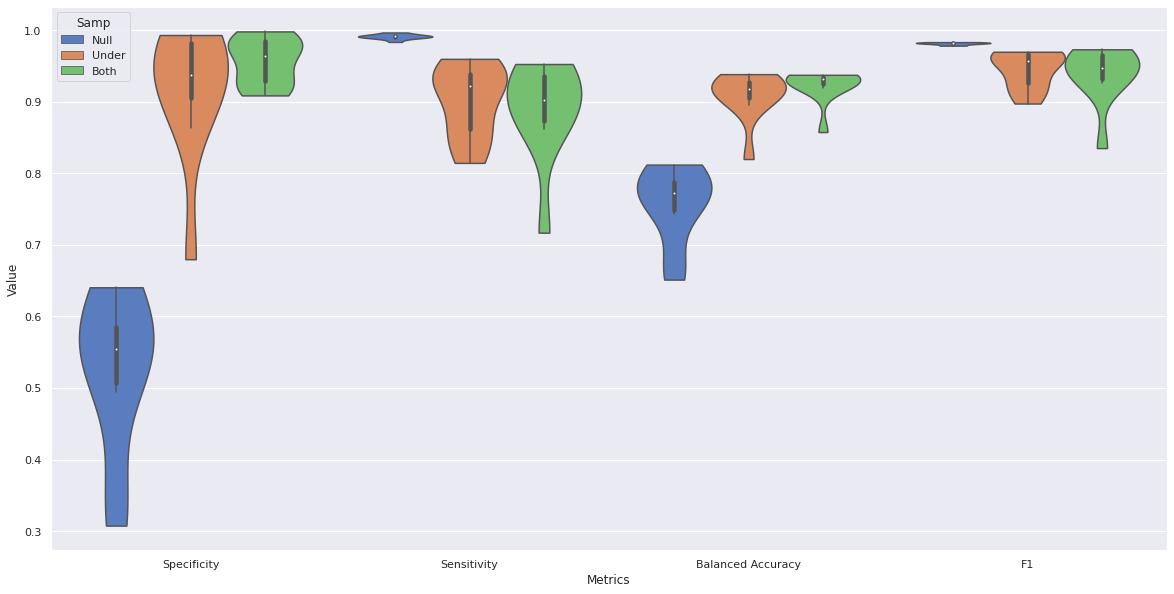

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(x="Metrics", y="Value",hue="Samp", data=results, scale="count", inner= "box",palette="muted", cut=0)

Como vemos, al entrenar con el conjunto original el modelo tiene problemas al detectar secuencias etiquetadas como Normal. Al aplicar undersampling mejora notablemente la capacidad del modelo para detectar Normales, aunque se reduce la capacidad de detección de Botnets. Finalmente, aplicando oversampling y undersampling, obtenemos resultados similares a los obtenidos con undersampling solo que menos dispersos. No se utiliza solo oversampling debido a que el conjunto resultante poseería demasiadas observaciones y para trabajar con ellos se necesitarían recursos computacionales con los que no se cuentan.

Dado los resultados obtenidos, se utilizara oversampling + undersampling, para (como se dijo anteriormente) garantizar que el conjunto de datos resultante sea lo suficientemente grande como para ajustarse a un modelo razonable y que no se descarte demasiada información útil de la clase mayoritaria.


### Elección de parámetros

En el aprendizaje automático, la *optimización o el ajuste de hiperparámetros* es el problema de elegir un conjunto de hiperparámetros óptimos para un algoritmo de aprendizaje. Un **hiperparámetro** es un parámetro cuyo valor se utiliza para controlar el proceso de aprendizaje. Por el contrario, hay otros parámetros cuyos valores se aprenden en el proceso (como el peso).

La optimización de hiperparámetros encuentra una tupla de hiperparámetros que produce un modelo óptimo que minimiza una función de pérdida predefinida en datos independientes dados. La función objetivo toma una tupla de hiperparámetros y devuelve la pérdida asociada. La validación cruzada se utiliza a menudo para estimar este rendimiento de generalización. 

En este estudio se verán cuatro combinaciones:

+ cp1: units=128, dropout = 0.1, optimization = rmsprop y epoch = 10
+ cp2: units=128, dropout = 0.1, optimization = rmsprop, epoch = 10 con una capa bidireccional
+ cp3: units=128, dropout = 0.1, optimization = adam y epoch = 10
+ cp4: units=128, dropout = 0.1, optimization = rmsprop y epoch = 30

Para nada se considera suficiente este análisis, y esta muy lejos de serlo. Para poder tener más certeza sobre la mejor combinación de valores se deberían probar muchas otras combinaciones, tomando en cuenta más parámetros y distintos valores para estos. Pero en esta instancia solo se busca tener una aproximación al problema. 

Los valores elegidos para los parámetros se eligieron con base en investigaciones previas sobre este mismo problema.


In [ ]:
url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_MCCV_ctu19.csv'
cp1 = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_MCCV_ctu19_Bidirectional.csv'
cp2 = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_MCCV_ctu19_adam.csv'
cp3 = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_MCCV_ctu19_e30.csv'
cp4 = pd.read_csv(url)

In [ ]:
cp1 = toLongFormat(cp1)
cp2 = toLongFormat(cp2)
cp3 = toLongFormat(cp3)
cp4 = toLongFormat(cp4)

cp1['cp'] = 'cp1'
cp2['cp'] = 'cp2'
cp3['cp'] = 'cp3'
cp4['cp'] = 'cp4'

results = pd.concat([cp1, cp2, cp3, cp4])

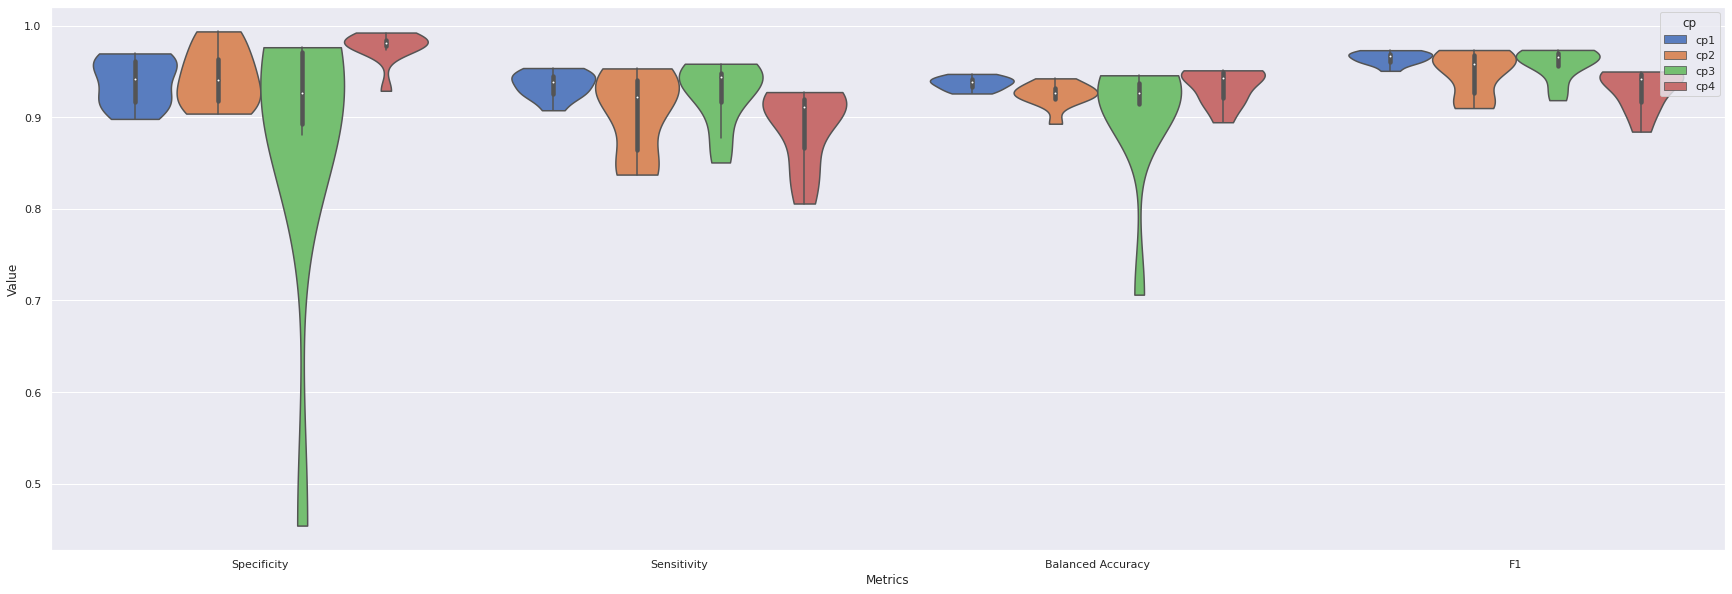

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.violinplot(x="Metrics", y="Value",hue="cp", data=results, scale="count", inner= "box",palette="muted", cut=0)

No hay una mejora significativa al usar una capa bidirectional, tomando en cuenta que incrementa notablemente el tiempo de ejecución.

Se ve un aumento en la desviación estándar al usar adam en vez de rmsprop.

Tenemos resultados similares entre cp1 y cp4. Solo que cp4 requiere más tiempo de ejecución y tiene una desviación mayor.

### Evaluación sobre CTU13

Finalmente, una vez elegida la técnica de remuestreo y los parámetros para el entrenamiento, se entrena con todo el ctu19 y se testea con ctu13. Los resultados se medirán según las métricas ya especificadas.

Dada la aleatoriedad de las técnicas de muestreo se repite el experimento 30 veces.

Se desea comparar los resultados obtenidos al usar una red neuronal recurrente LSTM con una del tipo GRU. Es importante destacar que para el entrenamiento con GRU se utilizaran los mismos valores de parámetros que se usaron para el entrenamiento con la red LSTM. Esto hace que los resultados no sean "justos" ya que podrían estos valores favorecer más a un tipo de red que a otra. Al menos, nos permitiría tener una idea.

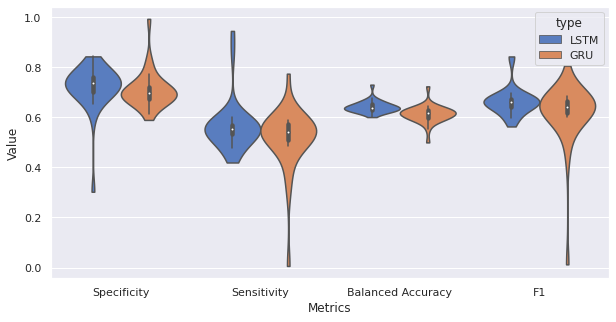

In [ ]:
url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/LSTM_metrics_ctu19_ctu13.csv'
results_LSTM = pd.read_csv(url)
results_LSTM = toLongFormat(results_LSTM)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/GRU_metrics_ctu19_ctu13.csv'
results_GRU = pd.read_csv(url)
results_GRU = toLongFormat(results_GRU)

results_LSTM['type'] = 'LSTM'
results_GRU['type'] = 'GRU'

results = pd.concat([results_LSTM, results_GRU])

sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(x="Metrics", y="Value",hue="type", data=results, scale="count", inner= "box",palette="muted", cut=0)

Aparentemente se tienen mejores resultados al utilizar redes LSTM. Es importante saber si esta diferencia que se observa es *estadisticamente significativa*.

#### Mann-Whitney U Test

**Mann-Whitney U Test** es una prueba de significación estadística no paramétrica para determinar si dos muestras independientes se extrajeron de una población con la misma distribución.

Se decide realizar esta prueba para determinar si existe una diferencia estadísticamente significativa en los resultados entre los dos grupos. En este caso, tomando en cuenta el Balanced Accuracy.

La estrategia consiste en determinar si los valores de las dos muestras se mezclan aleatoriamente en el orden de clasificación o si se agrupan en extremos opuestos cuando se combinan. Un orden de clasificación aleatorio significaría que las dos muestras no son diferentes, mientras que un grupo de valores de una muestra indicaría una diferencia entre ellas.

Tomamos:

+ *Hipótesis Nula*: Las distribuciones de la muestra son iguales
+ *Hipótesis alternativa*: Las distribuciones de la muestra NO son iguales
+ alfa = 0.05

In [ ]:
import scipy.stats as stats

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/LSTM_metrics_ctu19_ctu13.csv'
results_LSTM = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/GRU_metrics_ctu19_ctu13.csv'
results_GRU = pd.read_csv(url)

# Balanced Accuracy
statistic, pvalue = stats.mannwhitneyu(results_LSTM['Balanced Accuracy'], results_GRU['Balanced Accuracy'], alternative='two-sided')

print('data1: statistic= %.1f  pvalue= %.6f' % (statistic, pvalue))

data1: statistic= 737.0  pvalue= 0.000023


Luego, el valor p es menor que el nivel de significancia, por lo que se puede determinar que esta diferencia es estadísticamente significativa.

### Diferencia en resultados

Se puede ver un rendimiento inferior al entrenar con un conjunto y probar con otro (CTU19 y CTU13) comparado con entrenar y probar con el mismo conjunto (CTU19). Al unir ambos conjuntos y realizar una MCCV podemos ver una mejora en los resultados. Esto ultimo nos permite ver que el mal rendimiento al entrenar con un conjunto y probar con otro es debido a que el conjunto de entrenamiento no es representativo de la población, lo que lleva a que el modelo que fué entrenado con el CTU19 no reconozca mucha de las observaciones del CTU13. 

No se puede decir que, como al juntar los conjuntos tenemos mejores resultados, el problema está solucionado, ya que puede que el nuevo conjunto siga sin ser representativo de la población.




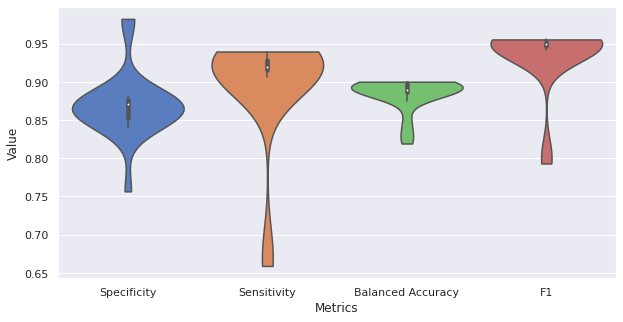

In [ ]:
url = 'https://raw.githubusercontent.com/DuzzLogic/Botnet_Detection/main/metrics_MCCV_both.csv'
results = pd.read_csv(url)

results = toLongFormat(results)

sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(x="Metrics", y="Value", data=results, scale="count", inner= "box",palette="muted", cut=0)

## Conclusiones finales

Se puede concluir que las Redes Neuronales Recurrentes son capaces de clasificar el comportamiento del tráfico obteniendo muy buenos resultados en las métricas analizadas. Por otro lado, podemos ver que tienen mayores dificultades con conjuntos desbalanceados, siendo necesario aplicar una técnica de muestreo para "equilibrar" los conjuntos y obtener mejores resultados.

Un problema que se presentó es que el conjunto de entrenamiento no es representativo, por lo que al entrenar con el CTU19 y probar con el CTU13 los resultados empeoran significativamente con respecto a los resultados obtenidos al entrenar y probar con el CTU19.

Finalmente, se observó un mejor rendimiento al usar redes LSTM con respecto a las redes GRU. Pero el análisis previo al entrenamiento y la elección de los valores de los parámetros se hicieron utilizando unicamente redes LSTM, por lo que las elecciones al entrenar pueden tener un sesgo hacia las redes LSTM y, por ende, la comparativa no sea confiable.


# Bibliografia

 + [Deep Learning](https://www.deeplearningbook.org/)
 + [Deep Learning with Python/R (Chollet)]
 + [Paper sobre redes currentes ARGENCON 2016]
 + [Sampling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) 
 + [How to fix unbalanced dataset](https://www.kdnuggets.com/2019/05/fix-unbalanced-dataset.html)
 + [Keras API reference](https://keras.io/api/)
 + [MCCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit)
 + [Dropout](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
 + [RNN vs GRU vs LSTM](https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573)
 + [RNN, LSTM y GRU](http://rios.tecnm.mx/cdistribuido/recursos/DLScr/PLN.html)
 + [LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)
 + [Machine Learning Experimental Design 101](https://harpomaxx.github.io/post/experimental-design/)
 + [Validacion Cruzada](https://www.cienciadedatos.net/documentos/30_cross-validation_oneleaveout_bootstrap)